# Importiere Daten


In [131]:

# import os,sys
import numpy as np
import pandas as pd
import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
# import subprocess


## Funktionen definieren

In [132]:
def select_every_12th_with_start(arr, start_index):
    if start_index < 1 or start_index > 12:
        raise ValueError("Start index must be between 1 and 11")

    selected_elements = []
    for i in range(start_index - 1, len(arr), 12):
        selected_elements.append(arr[i])
    
    return selected_elements

## Daten importieren

In [133]:
# File paths
TMin_file = 'data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'
TAvg_file = 'data\cru_ts4.07.1901.2022.tmp.dat.nc\cru_ts4.07.1901.2022.tmp.dat.nc'

# Load datasets
TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)
TAvg =  xr.open_dataset(TAvg_file)

## Differenz berechnen

In [134]:
temperature_difference = TMax.tmx - TMin.tmn   # Normale Differenz fü jeden Punkt

In [135]:
#Projeziert auf eine latitude
TMin_Lat = TMin.mean('lon')
TMax_Lat = TMax.mean('lon')
TAvg_Lat = TAvg.mean('lon')

In [136]:
temperature_difference_Lat = TMax_Lat.tmx- TMin_Lat.tmn # Creating lateral difference

In [137]:
# np.count_nonzero(~np.isnan(TMax_Lat.tmx.isel(time = 0)))
# # temperature_difference.isel(time =0,lat = 330, lon = 265)

In [138]:
time_values = TMax['time'].values

## Plots

(8294.0, 11338.0)

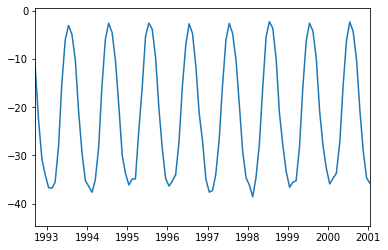

In [139]:
plt.plot(time_values, TMin_Lat.isel(lat = 330).tmn)
plt.xlim(time_values[1100], time_values[1200])

In [140]:
steps = [60.25, 65.25, 70.25, 75.25, 80.25, 85.25]

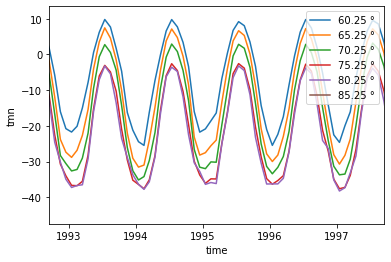

In [141]:
# Plot tmn
for i in steps:
    plt.plot(time_values, TMin_Lat.sel(lat = str(i)).tmn, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmn')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

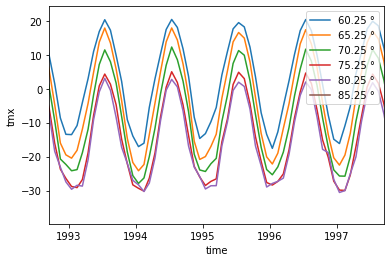

In [142]:
# Plot tmx
for i in steps:
    plt.plot(time_values, TMax_Lat.sel(lat = str(i)).tmx, label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('tmx')

plt.xlim(time_values[1100], time_values[1160])
plt.legend(loc = 1)

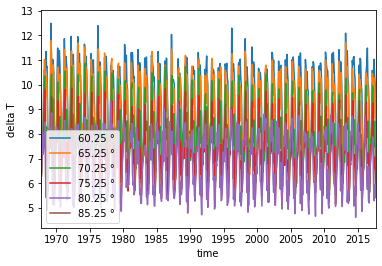

In [143]:
# Plot tmx
for i in steps:
    plt.plot(time_values, temperature_difference_Lat.sel(lat = str(i)), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

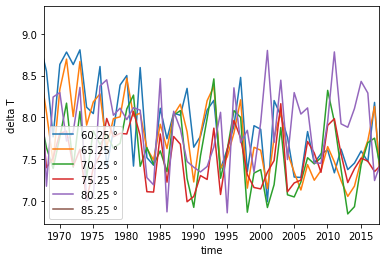

In [144]:
# Nach Jahreszeiten selektiert Januar

for i in steps:
    plt.plot(time_values[::12], temperature_difference_Lat.sel(lat = str(i))[::12], label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

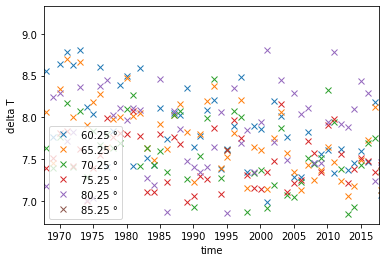

In [145]:
# Nach Jahreszeiten selektiert Januar

for i in steps:
    plt.plot(time_values[::12], temperature_difference_Lat.sel(lat = str(i))[::12],ls = '', marker = 'x', label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

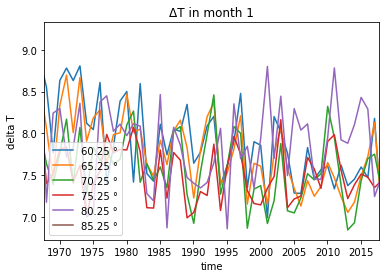

In [146]:
# Nach Jahreszeiten selektiert Januar
month = 1

for i in steps:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')

plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[800], time_values[1400])
plt.legend(loc = 3)

plt.tight_layout

In [147]:
# for month in range(1,11):
#     # Nach Jahreszeiten selektiert Januar
#     month = 1

#     for i in steps:
#         plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month), label = str(i)+' °')

#     plt.xlabel('time')
#     plt.ylabel('delta T')

#     plt.title('ΔT in month ' + str(month))

#     plt.xlim(time_values[800], time_values[1400])
#     plt.legend(loc = 3)

#     plt.tight_layout
#     plt.savefig('Delta_T_Month_'+str(month)+'.pdf')

In [148]:
import matplotlib.pyplot as plt

# Assuming you have defined steps, time_values, and temperature_difference_Lat somewhere above

for month in range(1, 13):
    for i in steps:
        plt.plot(
            select_every_12th_with_start(time_values, month),
            select_every_12th_with_start(temperature_difference_Lat.sel(lat=str(i)), month),
            label=str(i) + ' °'
        )

    plt.xlabel('time')
    plt.ylabel('delta T')

    plt.title('ΔT in month ' + str(month))

    plt.xlim(time_values[800], time_values[1400])
    plt.legend(loc=3)

    plt.tight_layout()  # Add parentheses here

    plt.savefig('Delta_T_Month_' + str(month) + '.png', dpi = 300)
    plt.clf()  # Clear the plot for the next iteration


<Figure size 432x288 with 0 Axes>

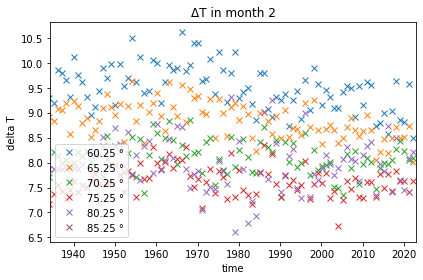

In [149]:
# Nach Jahreszeiten selektiert Januar
month = 2

for i in steps:
    plt.plot(select_every_12th_with_start(time_values,month), select_every_12th_with_start(temperature_difference_Lat.sel(lat = str(i)),month),ls = '', marker = 'x', label = str(i)+' °')

plt.xlabel('time')
plt.ylabel('delta T')
plt.title('ΔT in month ' + str(month))

plt.xlim(time_values[400], time_values[-1])
plt.legend(loc = 3)

plt.tight_layout()

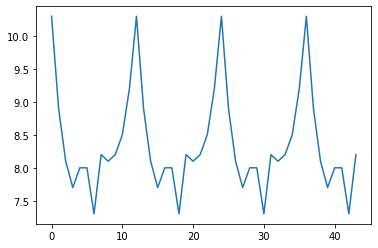

In [150]:

plt.plot(temperature_difference.isel(time =range(3,47, 1),lat = 330, lon = 265))

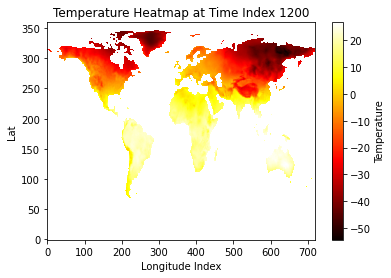

In [151]:
time_index = 1200
temperature_data = TMin.isel(time=time_index).tmn#,lon = range(0,260), lat = range(330,360)).tmn

plt.imshow(temperature_data, cmap='hot', origin='lower', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Heatmap at Time Index {time_index}')
plt.xlabel('Longitude Index')
plt.ylabel('Lat')
plt.show()